In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW2_package/hw2_prob1.mat"
mat_data = scipy.io.loadmat(mat_path)

# 변수 할당
A = mat_data['A']

In [3]:
def f(x):
    return - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x))
def grad(x):
    return (A.T @ np.reciprocal(1 - A @ x) + np.reciprocal(1 - x))
def hessian(x):
    return (((A.T @ np.diag(np.squeeze(np.reciprocal(1- A @ x) ** 2))) @ A) + np.diag(np.squeeze(np.reciprocal(1- x)** 2)))

In [4]:
# Gradient Descent 
xk = np.zeros((100, 1))
alpha = 0.01
beta = 0.5
temp = 1e-3
arr_t = []
arr_x= []


while np.linalg.norm(grad(xk), 2)  > temp:
    delta_x = -grad(xk)
    t = 1
    
    #feasibility check
    while np.max(A @ (xk + t * delta_x)) >= 1 or np.max(xk + t * delta_x) >= 1:
        t = beta * t
    
    #backtracking line search
    while f(xk + t * delta_x) > (f(xk) + alpha * t * grad(xk).T @ delta_x):
        t = beta * t
        
    xk = xk + t * delta_x
    
    arr_x.append(f(xk))
    arr_t.append(t)

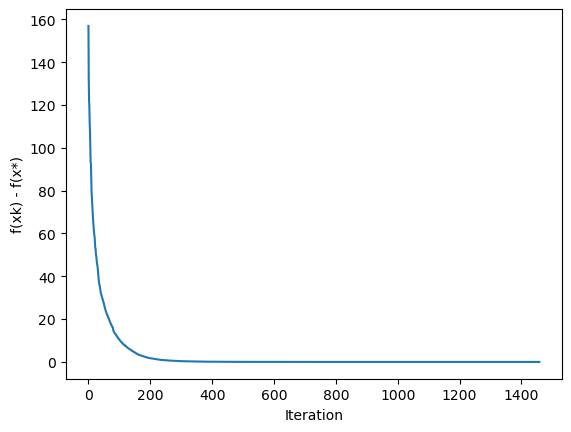

In [5]:
plt.plot(arr_x - arr_x[-1])
plt.xlabel('Iteration')
plt.ylabel('f(xk) - f(x*)')

plt.show()

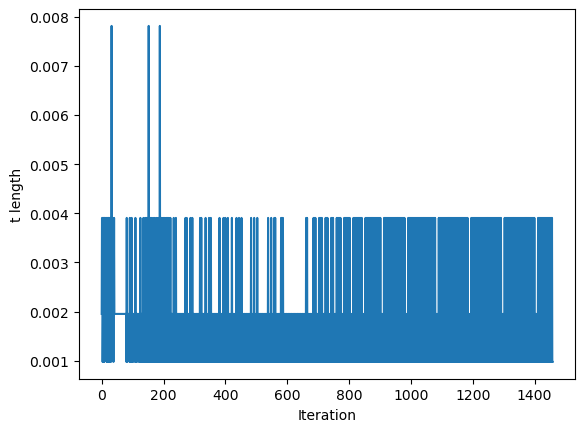

In [6]:
plt.plot(arr_t)
plt.xlabel('Iteration')
plt.ylabel('t length')
plt.show()

In [7]:
# Newton's Method 
xk = np.zeros((100, 1))
alpha = 0.01
beta = 0.5
temp = 1e-3
arr_t = []
arr_x= []


while np.linalg.norm(grad(xk), 2)  > temp:
    delta_x = - (np.linalg.inv(hessian(xk)) @ grad(xk))
    t = 1
    
    #feasibility check
    while np.max(A @ (xk + t * delta_x)) >= 1 or np.max(xk + t * delta_x) >= 1:
        t = beta * t
    
    #backtracking line search
    while f((xk + t * delta_x)) > (f(xk) + alpha * t * grad(xk).T @ delta_x):
        t = beta * t
        
    xk = xk + t * delta_x
    
    arr_x.append(f(xk))
    arr_t.append(t)

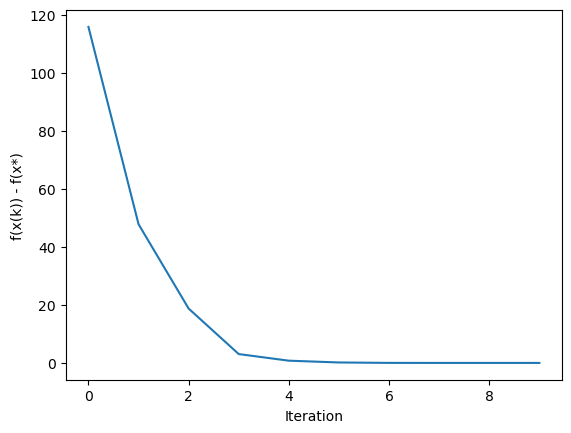

In [8]:
plt.plot(arr_x - arr_x[-1])
plt.xlabel('Iteration')
plt.ylabel('f(x(k)) - f(x*)')

plt.show()

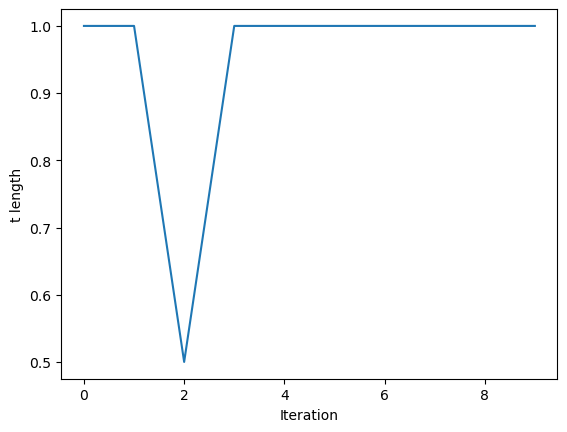

In [9]:
plt.plot(arr_t[:10])
plt.xlabel('Iteration')
plt.ylabel('t length')
plt.show()